In [89]:
import scipy.io as sci
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

### Separate based on response (flash first or beep first)

In [90]:
resppath = 'StabilityofPCommonData/NumerosityTaskUnformatted/*.mat'
respfiles = np.array(glob.glob(resppath))
datapath = 'StabilityofPCommonData/NumerosityTaskData/*.mat'
datafiles = np.array(glob.glob(datapath))

In [91]:
# filenames for f or b responses
respf = np.empty((1, 1))
respb = np.empty((1, 1))
for names in respfiles:
    mat = sci.loadmat(names)
    resp = mat['respCode']
    if(resp == "f"):
        respf = np.append(respf, names)
    else:
        respb = np.append(respb, names)
respf = respf[1:]
respb = respb[1:]

In [92]:
# index for flash first files(1 if yes 0 if no) 
# use for TaskData to pull data for subjects that reported flash first
indexf = list()
c = 0
for x in respfiles:
    if x in respf:
        indexf.append(c)
    c += 1
#respfiles[indexf]

# exclude files that are incomplete
dataf = datafiles[indexf]
missing = np.empty((1,1), dtype = int)

for i in np.arange(0, len(dataf)):
    mat = sci.loadmat(dataf[i])
    #print(len(mat['trialData']))
    if len(mat['trialData']) < 360:
        missing = np.append(missing, i)
        #print(len(mat['trialData']), i)
missing = missing[1:]
indexf = np.delete(indexf, missing)

### Extract trial data and response times for flash trials

In [93]:
# further subset into flash reported and insert indices for subject id  
dataf = datafiles[indexf]

subjidf = np.array([2,5,7,7,11,11,12,12,15,15,19,20,20,23,28,31,32,32,35,36,37,37,40,
                   40,41,41,42,50,50,53,53,54,54,57,57,60,60,61,61,64])
trialsf = np.empty((1,5))
for i in np.arange(0, len(dataf)):
    mat = sci.loadmat(dataf[i])
    arr = mat['trialData']
    # add subject id to the first column
    arr = np.insert(arr, 0, int(subjidf[i]), axis=1)
    trialsf = np.vstack((trialsf, arr))
trialsf = trialsf[1:]
print(len(trialsf))

# add a response column to second column, 1 if correct 0 if wrong
respcolf = np.empty((1,1))
respcolb = np.empty((1,1))

for rows in trialsf:
    if rows[1] == rows[3]:
        respcolf = np.append(respcolf, 1)
    else:
        respcolf = np.append(respcolf, 0)
respcolf = respcolf[1:]

for rows in trialsf:
    if rows[2] == rows[4]:
        respcolb = np.append(respcolb, 1)
    else:
        respcolb = np.append(respcolb, 0)
respcolb = respcolb[1:]

trialsf = np.insert(trialsf, 1, respcolf, axis=1)
trialsf = np.insert(trialsf, 2, respcolb, axis=1)

14400


In [94]:
# extract response times from taskunformatted and merge with trialdata
resptimes = np.empty((1,1))

# only include files that correspond to complete trialData
respf = respfiles[indexf]

for i in np.arange(0, len(respf)):
    mat = sci.loadmat(respf[i])
    arr = mat['resptime']
    resptimes = np.append(resptimes, arr)
resptimes = resptimes[1:]
#print(len(resptimes))

trialsf = pd.DataFrame(np.insert(trialsf, 1, resptimes, axis = 1), 
                        columns=['Subj_id', 'rt', 'responsef', 'responseb', 'flashpres', 'beeppres', 'flashresp', 'beepresp'])
#trialsf = np.insert(trialsf, 1, resptimes, axis = 1)

### Remove outliers for comparing

In [95]:
trialsfsd = trialsf['rt'].std()
trialsf = trialsf.loc[(trialsf['rt'] <= trialsfsd*3) & (trialsf['rt'] > 0)]

### Further subset into congruent, incongruent, and unimodal rows

In [96]:
congf = trialsf.loc[trialsf['flashpres'] == trialsf['beeppres']]

incongf = trialsf.loc[(trialsf['flashpres'] != trialsf['beeppres']) & (trialsf['flashpres'] != 0) & (trialsf['beeppres'] != 0)]

unif = trialsf.loc[(trialsf['flashpres'] != 0) & (trialsf['beeppres'] == 0)]

audiof = trialsf.loc[(trialsf['flashpres'] == 0) & (trialsf['beeppres'] != 0)]

##### The formatting for the data to be inputed is as follows:
Column 1: Subject ID <br>
Column 2: Response Time <br>
Column 3: Response for flashes  <br>
Column 4: Response for beeps <br>
Column 5: Flashes presented <br>
Column 6: Beeps presented <br>
Column 7: Flashes reported <br>
Column 8: Beeps reported <br>

### Repeat for beep trials

In [106]:
# index for flash first files(1 if yes 0 if no) 
# use for TaskData to pull data for subjects that reported flash first
indexb = list()
c = 0
for x in respfiles:
    if x in respb:
        indexb.append(c)
    c += 1
#respfiles[indexf]

# exclude files that are incomplete
datab = datafiles[indexb]
missing = np.empty((1,1), dtype = int)

for i in np.arange(0, len(datab)):
    mat = sci.loadmat(datab[i])
    #print(len(mat['trialData']))
    if len(mat['trialData']) < 360:
        missing = np.append(missing, i)
        #print(len(mat['trialData']), i)
missing = missing[1:]
indexb = np.delete(indexb, missing)

In [107]:
datab = datafiles[indexb]
subjidb = np.array([6,6,9,10,10,13,14,14,16,16,21,21,22,25,25,26,26,
                    29,30,30,34,36,39,39,42,44,44,47,47,48,48,51,51,59,59,62,62,63,63,64])
trialsb = np.empty((1,5))
for i in np.arange(0, len(datab)):
    mat = sci.loadmat(datab[i])
    arr = mat['trialData']
    # add subject id to the first column
    arr = np.insert(arr, 0, int(subjidb[i]), axis=1)
    trialsb = np.vstack((trialsb, arr))
trialsb = trialsb[1:]
print(len(trialsb))

# add a response column to second column, 1 if correct 0 if wrong
respcolf = np.empty((1,1))
respcolb = np.empty((1,1))

for rows in trialsb:
    if rows[1] == rows[3]:
        respcolf = np.append(respcolf, 1)
    else:
        respcolf = np.append(respcolf, 0)
respcolf = respcolf[1:]

for rows in trialsb:
    if rows[2] == rows[4]:
        respcolb = np.append(respcolb, 1)
    else:
        respcolb = np.append(respcolb, 0)
respcolb = respcolb[1:]

trialsb = np.insert(trialsb, 1, respcolf, axis=1)
trialsb = np.insert(trialsb, 2, respcolb, axis=1)

14400


In [108]:
# extract response times from taskunformatted and merge with trialdata
resptimes = np.empty((1,1))

# only include files that correspond to complete trialData
respb = respfiles[indexb]

for i in np.arange(0, len(respb)):
    mat = sci.loadmat(respb[i])
    arr = mat['resptime']
    resptimes = np.append(resptimes, arr)
resptimes = resptimes[1:]

#trialsb = np.insert(trialsb, 1, resptimes, axis = 1)
trialsb = pd.DataFrame(np.insert(trialsb, 1, resptimes, axis = 1), 
                        columns=['Subj_id', 'rt', 'responsef', 'responseb', 'flashpres', 'beeppres', 'flashresp', 'beepresp'])

In [110]:
trialsbsd = trialsb['rt'].std()
trialsb = trialsb.loc[(trialsb['rt'] <= trialsbsd*3) & (trialsb['rt'] > 0)]

In [125]:
congb = trialsb.loc[trialsb['flashpres'] == trialsb['beeppres']]

incongb = trialsb.loc[(trialsb['flashpres'] != trialsb['beeppres']) & (trialsb['flashpres'] != 0) & (trialsb['beeppres'] != 0)]

unib = trialsb.loc[(trialsb['flashpres'] != 0) & (trialsb['beeppres'] == 0)]

audiob = trialsb.loc[(trialsb['flashpres'] == 0) & (trialsb['beeppres'] != 0)]

### Plot response times for both 

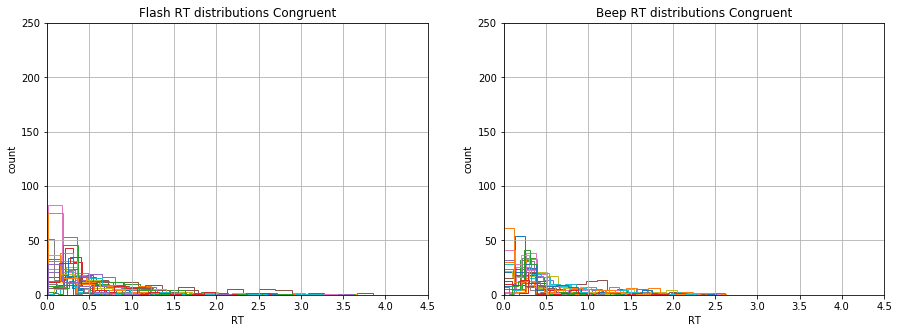

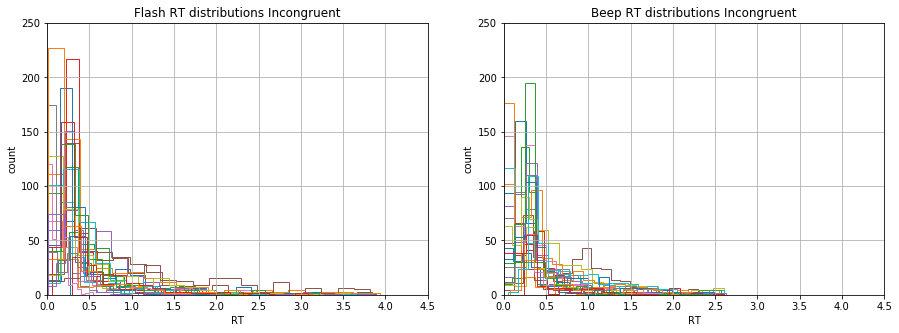

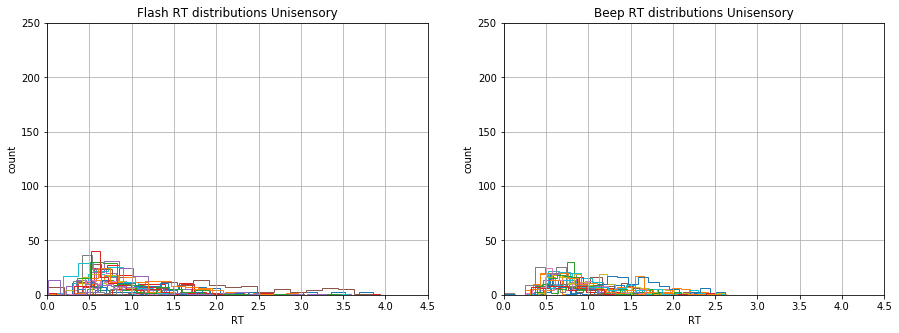

In [57]:
#test = hddm.utils.flip_errors(congfdata)

# compare congruent 
congfig = plt.figure(figsize=(15, 5))
ax = congfig.add_subplot(121, xlabel='RT', ylabel='count', title='Flash RT distributions Congruent')
ax.set_xlim([0, 4.5])
ax.set_ylim([0, 250])
for i, subj_data in congf.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

ax = congfig.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Congruent')
ax.set_xlim([0, 4.5])
ax.set_ylim([0, 250])
for i, subj_data in congb.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

# compare incongruent
incongfig = plt.figure(figsize=(15, 5))
ax = incongfig.add_subplot(121, xlabel='RT', ylabel='count', title='Flash RT distributions Incongruent')
ax.set_xlim([0, 4.5])
ax.set_ylim([0, 250])
for i, subj_data in incongf.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

ax = incongfig.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Incongruent')
ax.set_xlim([0, 4.5])
ax.set_ylim([0, 250])
for i, subj_data in incongb.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

# compare unisensory 
unifig = plt.figure(figsize=(15, 5))
ax = unifig.add_subplot(121, xlabel='RT', ylabel='count', title='Flash RT distributions Unisensory')
ax.set_xlim([0, 4.5])
ax.set_ylim([0, 250])
for i, subj_data in unif.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

ax = unifig.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Unisensory')
ax.set_xlim([0, 4.5])
ax.set_ylim([0, 250])
for i, subj_data in unib.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)


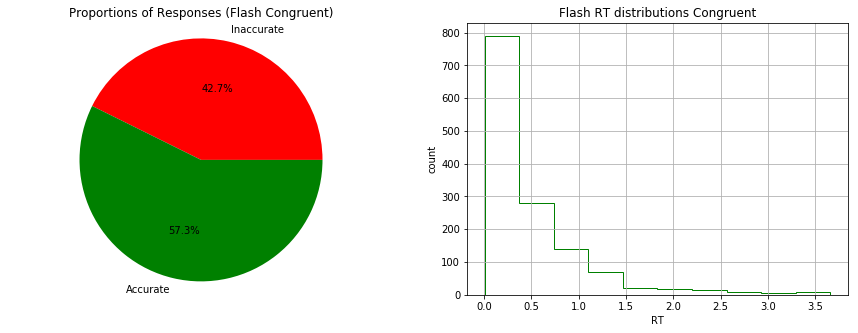

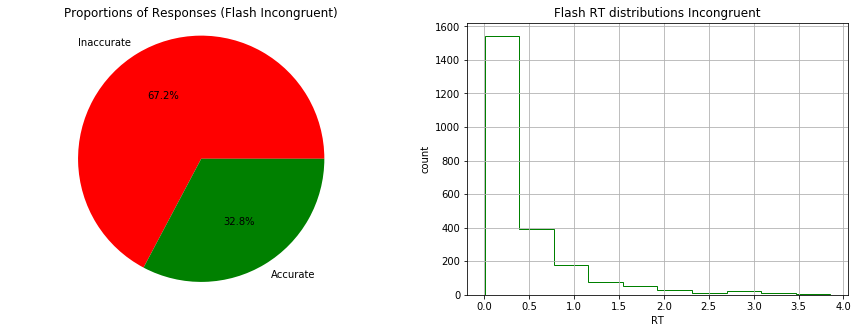

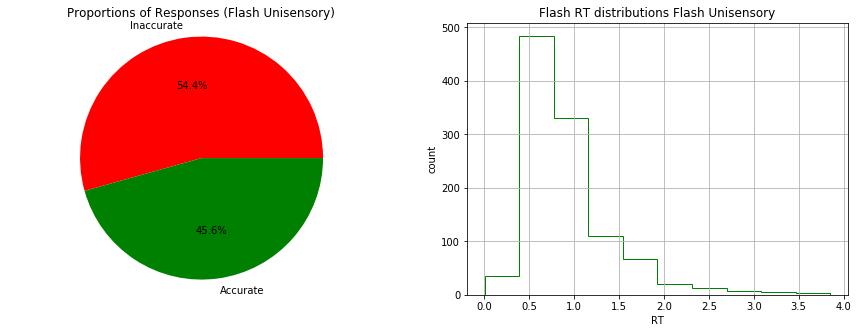

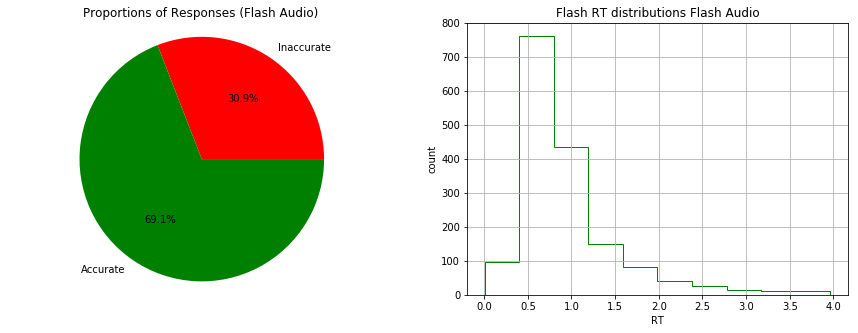

In [119]:
#print(congf['response'].value_counts())
sizes = [congf['responsef'].value_counts()[0], congf['responsef'].value_counts()[1]]
labels = ['Inaccurate', 'Accurate']

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121, title='Proportions of Responses (Flash Congruent)')
ax.pie(sizes, colors=["red", "green"], labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig.add_subplot(122, xlabel='RT', ylabel='count', title='Flash RT distributions Congruent')
#for i, subj_data in congf.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
congf.loc[congf['responsef'] == 1].rt.hist(histtype='step', edgecolor="green", ax = ax)    
    
#print(incongfdata['response'].value_counts())
sizes = [incongf['responsef'].value_counts()[0], incongf['responsef'].value_counts()[1]]
labels = ['Inaccurate', 'Accurate']

fig2 = plt.figure(figsize=(15, 5))
ax = fig2.add_subplot(121, title='Proportions of Responses (Flash Incongruent)')
ax.pie(sizes, colors=["red", "green"], labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig2.add_subplot(122, xlabel='RT', ylabel='count', title='Flash RT distributions Incongruent')
#for i, subj_data in incongf.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', edgecolor="green", ax=ax)
incongf.loc[incongf['responsef'] == 1].rt.hist(histtype='step', edgecolor="green", ax = ax)    

    
#print(unifdata['response'].value_counts())
sizes = [unif['responsef'].value_counts()[0], unif['responsef'].value_counts()[1]]
labels = ['Inaccurate', 'Accurate']

fig3 = plt.figure(figsize=(15, 5))
ax = fig3.add_subplot(121, title='Proportions of Responses (Flash Unisensory)')
ax.pie(sizes, colors=["red", "green"], labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig3.add_subplot(122, xlabel='RT', ylabel='count', title='Flash RT distributions Flash Unisensory')
#for i, subj_data in unif.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', edgecolor="green", ax=ax)
unif.loc[unif['responsef'] == 1].rt.hist(histtype='step', edgecolor="green", ax = ax)    

    
# unisensory audio
sizes = [audiof['responseb'].value_counts()[0], audiof['responseb'].value_counts()[1]]
labels = ['Inaccurate', 'Accurate']
    
fig4 = plt.figure(figsize=(15, 5))
ax = fig4.add_subplot(121, title='Proportions of Responses (Flash Audio)')
ax.pie(sizes, colors=["red", "green"], labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig4.add_subplot(122, xlabel='RT', ylabel='count', title='Flash RT distributions Flash Audio')
#for i, subj_data in audiof.groupby('responseb'):
#    subj_data.rt.hist(bins=20, histtype='step', edgecolor="green", ax=ax)
audiof.loc[audiof['responseb'] == 1].rt.hist(histtype='step', edgecolor="green", ax = ax)    

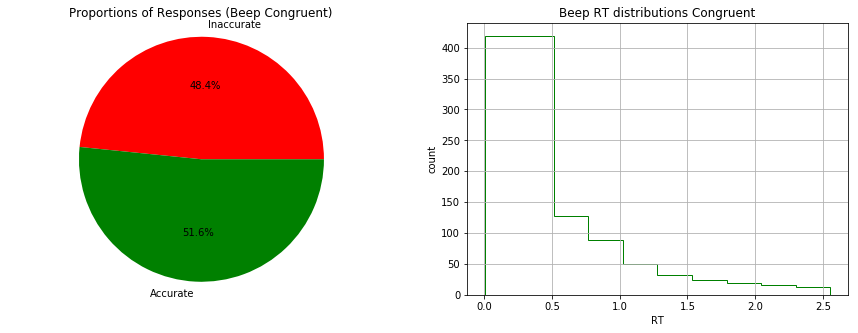

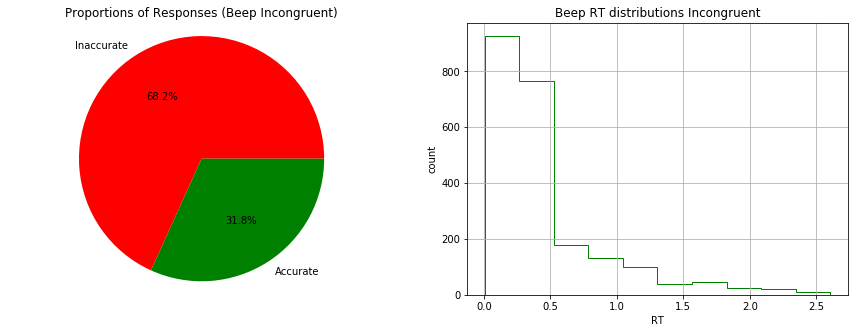

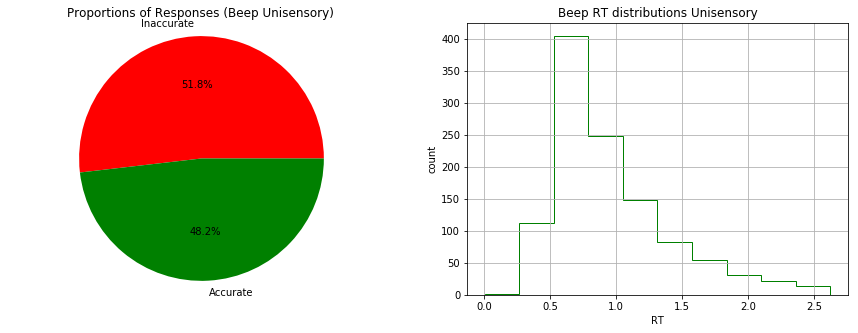

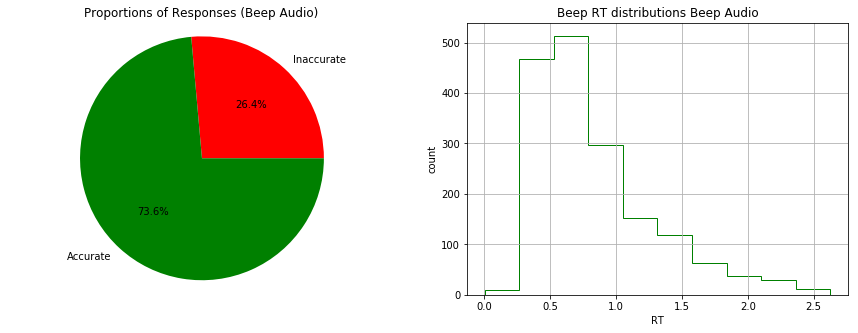

In [122]:
#print(congb['responsef'].value_counts())
sizes = [congb['responsef'].value_counts()[0], congb['responsef'].value_counts()[1]]
labels = ['Inaccurate', 'Accurate']

fig5 = plt.figure(figsize=(15, 5))
ax = fig5.add_subplot(121, title='Proportions of Responses (Beep Congruent)')
ax.pie(sizes, colors=["red", "green"], labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig5.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Congruent')
#for i, subj_data in congb.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
congb.loc[congb['responsef'] == 1].rt.hist(histtype='step', edgecolor="green", ax = ax)    

    
#print(incongbdata['response'].value_counts())
sizes = [incongb['responsef'].value_counts()[0], incongb['responsef'].value_counts()[1]]
labels = ['Inaccurate', 'Accurate']

fig6 = plt.figure(figsize=(15, 5))
ax = fig6.add_subplot(121, title='Proportions of Responses (Beep Incongruent)')
ax.pie(sizes, colors=["red", "green"], labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig6.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Incongruent')
#for i, subj_data in incongb.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
incongb.loc[incongb['responsef'] == 1].rt.hist(histtype='step', edgecolor="green", ax = ax)    
    
    
#print(unibdata['response'].value_counts())
sizes = [unib['responsef'].value_counts()[0], unib['responsef'].value_counts()[1]]
labels = ['Inaccurate', 'Accurate']

fig7 = plt.figure(figsize=(15, 5))
ax = fig7.add_subplot(121, title='Proportions of Responses (Beep Unisensory)')
ax.pie(sizes, colors=["red", "green"], labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig7.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Unisensory')
#for i, subj_data in unib.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
unib.loc[unib['responsef'] == 1].rt.hist(histtype='step', edgecolor="green", ax = ax)    


sizes = [audiob['responseb'].value_counts()[0], audiob['responseb'].value_counts()[1]]
labels = ['Inaccurate', 'Accurate']
    
fig8 = plt.figure(figsize=(15, 5))
ax = fig8.add_subplot(121, title='Proportions of Responses (Beep Audio)')
ax.pie(sizes, colors=["red", "green"], labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig8.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Beep Audio')
#for i, subj_data in audiof.groupby('responseb'):
#    subj_data.rt.hist(bins=20, histtype='step', edgecolor="green", ax=ax)
audiob.loc[audiob['responseb'] == 1].rt.hist(histtype='step', edgecolor="green", ax = ax)    

### Compare large and small incongruencies

In [18]:
smallincf = trialsf.loc[((trialsf['flashpres'] == 1) & (trialsf['beeppres'] == 2))]
smallincf = smallincf.append(trialsf.loc[((trialsf['flashpres'] == 2) & (trialsf['beeppres'] == 1))])

largeincf = trialsf.loc[(trialsf['flashpres'] == 1) & (trialsf['beeppres'] == 4)]
largeincf = largeincf.append(trialsf.loc[((trialsf['flashpres'] == 4) & (trialsf['beeppres'] == 1))])

smallincb = trialsb.loc[(trialsb['flashpres'] == 1) & (trialsb['beeppres'] == 2)]
smallincb = smallincb.append(trialsb.loc[((trialsb['flashpres'] == 2) & (trialsb['beeppres'] == 1))])

largeincb = trialsb.loc[(trialsb['flashpres'] == 1) & (trialsb['beeppres'] == 4)]
largeincb = largeincb.append(trialsb.loc[((trialsb['flashpres'] == 4) & (trialsb['beeppres'] == 1))])

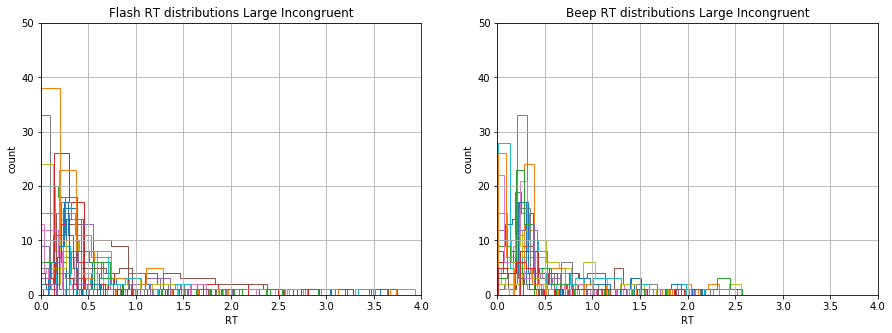

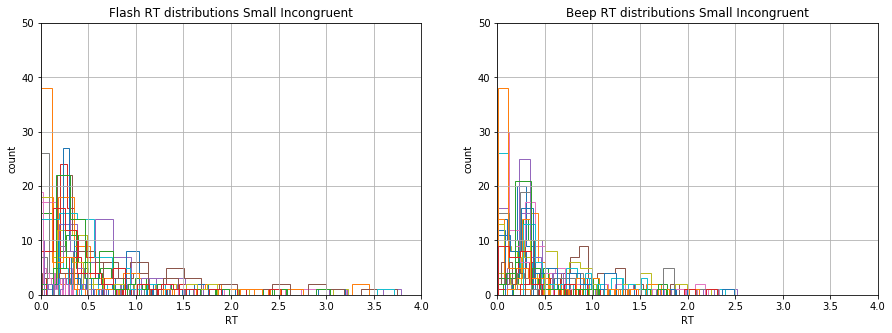

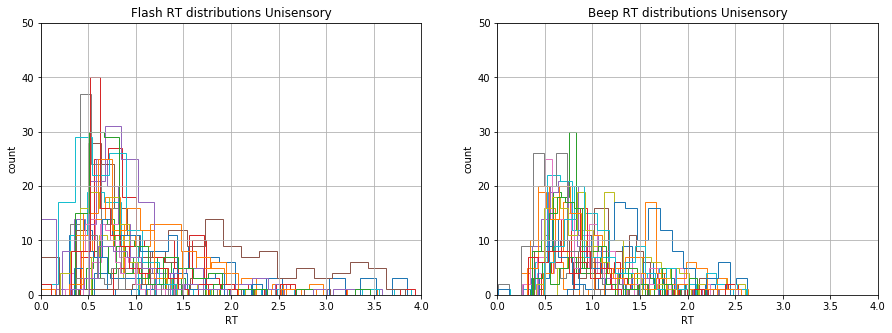

In [19]:
largeincfig = plt.figure(figsize=(15, 5))
ax = largeincfig.add_subplot(121, xlabel='RT', ylabel='count', title='Flash RT distributions Large Incongruent')
ax.set_xlim([0, 4])
ax.set_ylim([0, 50])
for i, subj_data in largeincf.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# one row has -1 rt

ax = largeincfig.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Large Incongruent')
ax.set_xlim([0, 4])
ax.set_ylim([0, 50])
for i, subj_data in largeincb.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
    
smallincfig = plt.figure(figsize=(15, 5))
ax = smallincfig.add_subplot(121, xlabel='RT', ylabel='count', title='Flash RT distributions Small Incongruent')
ax.set_xlim([0, 4])
ax.set_ylim([0, 50])
for i, subj_data in smallincf.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

ax = smallincfig.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Small Incongruent')
ax.set_xlim([0, 4])
ax.set_ylim([0, 50])
for i, subj_data in smallincb.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
    
unifig2 = plt.figure(figsize=(15, 5))
ax = unifig2.add_subplot(121, xlabel='RT', ylabel='count', title='Flash RT distributions Unisensory')
ax.set_xlim([0, 4])
ax.set_ylim([0, 50])
for i, subj_data in unif.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

ax = unifig2.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Unisensory')
ax.set_xlim([0, 4])
ax.set_ylim([0, 50])
for i, subj_data in unib.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

### Test difference in distribution for large and small incongruencies

In [29]:
# if we assume trials within subjects are independent we can use the Mann-Whitney U Test 

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(smallincf['rt'], largeincf['rt'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = mannwhitneyu(smallincb['rt'], largeincb['rt'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

print(len(smallincf))
print(len(largeincf))

print(len(smallincb))
print(len(largeincb))

Statistics=690911.000, p=0.335
Statistics=688842.000, p=0.395
1181
1182
1179
1176


In [32]:
stat, p = mannwhitneyu(congf['rt'], unif['rt'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
stat, p = mannwhitneyu(congb['rt'], unib['rt'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
stat, p = mannwhitneyu(incongb['rt'], unib['rt'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
stat, p = mannwhitneyu(incongb['rt'], unib['rt'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1135286.000, p=0.000
Statistics=1049439.000, p=0.000
Statistics=2737990.000, p=0.000
Statistics=2737990.000, p=0.000


### Test differences in distributions of rt and response between congruency and unisensory